<a href="https://colab.research.google.com/github/SHARATHCHINDAM/Deeplearning/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np #arrary Operstions
import pandas as pd #handling Dta
from sklearn.datasets import load_iris #plant Iris Dataset
from sklearn.model_selection import train_test_split# spliting dataset into train and test
import matplotlib.pyplot as plt #Ploting graph

Load Dataset

In [ ]:
dataset=load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

Initializing Weights

In [ ]:
np.random.seed(10)
firstweight=np.random.normal(scale=0.5, size=(input_size, hidden_size))
lastweight=np.random.normal(scale=0.5, size=(hidden_size, output_size))
firstweight

array([[ 0.66579325,  0.35763949],
       [-0.77270015, -0.00419192],
       [ 0.31066799, -0.36004278],
       [ 0.13275579,  0.05427426]])

Segregating Dta into x input and  y output

In [ ]:
x=dataset.data
y=dataset.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Convert categorical variable into dummy/ indicator variables

In [ ]:
y=pd.get_dummies(y).values

Split dataset into Trakin & test

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=20, random_state=4)

Initializing Hyper Parameters

In [ ]:
learningrate=0.1
epoch=5000
N=y_train.size
input_size=4
hidden_size=2
output_size=3
results=pd.DataFrame(columns=["MeanSquareError", "accuracy"])

Activation function

In [ ]:
def activationFn(x):
  return 1 / (1+np.exp(-x))

Mean square error

In [ ]:
def mse(y_pred, y_true):
  return ((y_pred - y_true)**2).sum()/(2*y_pred.size)

Evaluation Function Accuracy

In [ ]:
def accuracy(y_pred, y_true):
  acc=y_pred.argmax(axis=1)==y_true.argmax(axis=1)
  return acc.mean()

Training

In [ ]:
for i in range(epoch):
  #feedforward propagation on hidden layer
  firstNetInput=np.dot(x_train, firstweight)
  firstAFnOp= activationFn(firstNetInput)
  
  #feedforward propagation on output layer
  lastNetInput = np.dot(firstAFnOp, lastweight)
  lastAFnOp = activationFn(lastNetInput)

  #calculating error
  msevalue=mse(lastAFnOp, y_train)
  acc= accuracy(lastAFnOp, y_train)
  results=results.append({"MeanSquareError":msevalue, "accuracy":acc}, ignore_index=True)

  #backpropagation
  E1=lastAFnOp - y_train
  dfirstweight= E1*lastAFnOp*(1-lastAFnOp)

  E2=np.dot(dfirstweight, lastweight.T)
  dlastweight = E2*firstAFnOp*(1-firstAFnOp)

  #weight updates
  lastweight_update=np.dot(firstAFnOp.T, dfirstweight)/N
  firstweight_update=np.dot(x_train.T, dlastweight)/N

  lastweight=lastweight - learningrate * lastweight_update
  firstweight=firstweight- learningrate * firstweight_update

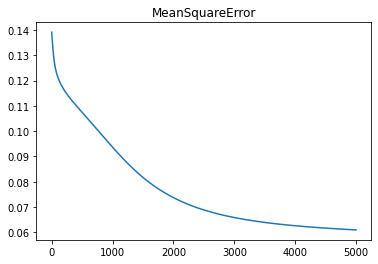

In [ ]:
results.MeanSquareError.plot(title="MeanSquareError")

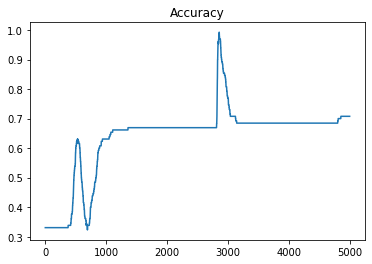

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
#feedforward
firstNetInput=np.dot(x_test, firstweight)
firstAFnOp= activationFn(firstNetInput)

lastNetInput = np.dot(firstAFnOp, lastweight)
lastAFnOp = activationFn(lastNetInput)

acc=accuracy(lastAFnOp, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8
